# Regresja wielomianowa

In [48]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices

import matplotlib.pyplot as plt

# Zadanie 1
Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$,

**Wskazówka**: `smf.ols('y ~ x + I(x**k)', data_frame)` lub `PolynomialFeatures` z `sklearn.preprocessing`

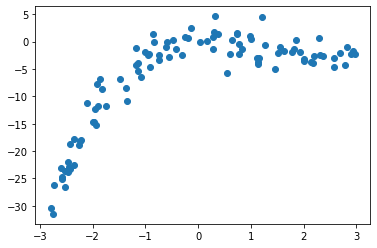

In [49]:
n = 100
x = stats.uniform.rvs(size=n, loc =-3, scale=6)
eps = stats.norm.rvs(size=n, loc=0, scale=2)
y = x - 2 * x**2 + 0.5 * x**3 + eps

plt.scatter(x,y)

In [50]:
X = sm.add_constant(x, prepend=True, has_constant='add')
model1 = sm. OLS(endog = y, exog = X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.33e-17
Time:                        14:57:05   Log-Likelihood:                -321.32
No. Observations:                 100   AIC:                             646.6
Df Residuals:                      98   BIC:                             651.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1362      0.610    -10.063      0.000      -7.346      -4.926
x1             3.6337      0.348     10.442      0.000       2.943       4.324
==============================================================================
Omnibus:                        8.819   Durbin-Watson:                   2.444
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                4.230
Skew:                          -0.265   Prob(JB):                        0.121
Kurtosis:                       2.143   Cond. No.                         1.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

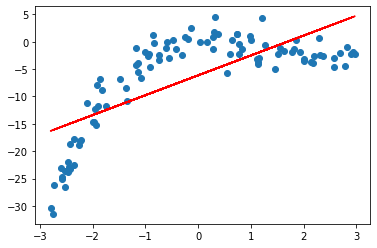

In [51]:
plt.scatter(x, y)
plt.plot(x, x * model1.params[1] + model1.params[0], color ='red', label ='degree=1')

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pol2 = PolynomialFeatures(degree = 2)
x2 = pol2.fit_transform(x.reshape(-1, 1))  # wygenerowanie danych wejściowych w postaci wektora (1, x, x^2)
model2 = sm.OLS(endog = y, exog = x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.7
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.36e-46
Time:                        14:57:06   Log-Likelihood:                -250.41
No. Observations:                 100   AIC:                             506.8
Df Residuals:                      97   BIC:                             514.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.464      0.003      0.998      -0.919       0.922
x1             3.5229      0.172     20.454      0.000       3.181       3.865
x2            -2.0042      0.115    -17.425      0.000      -2.232      -1.776
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.497
Skew:                           0.047   Prob(JB):                        0.780
Kurtosis:                       2.668   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

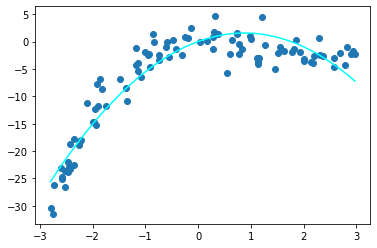

In [54]:
plt.scatter(x, y)

import operator
sort_axis = operator.itemgetter(0)

sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color='cyan', label='degree=2')

In [55]:
pol3 = PolynomialFeatures(degree = 3)
x3 = pol3.fit_transform(x.reshape(-1, 1))
model3 = sm.OLS(endog = y, exog = x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     565.2
Date:                Sun, 21 May 2023   Prob (F-statistic):           7.57e-61
Time:                        14:57:07   Log-Likelihood:                -212.39
No. Observations:                 100   AIC:                             432.8
Df Residuals:                      96   BIC:                             443.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1733      0.319      0.543      0.588      -0.460       0.807
x1             0.5233      0.310      1.686      0.095      -0.093       1.139
x2            -2.0903      0.079    -26.299      0.000      -2.248      -1.933
x3             0.5646      0.054     10.456      0.000       0.457       0.672
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.850
Skew:                           0.219   Prob(JB):                        0.396
Kurtosis:                       3.502   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

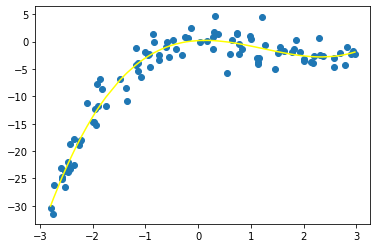

In [56]:
plt.scatter(x, y)

import operator
sort_axis = operator.itemgetter(0)

sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color='yellow', label='degree=3')

In [57]:
pol20 = PolynomialFeatures(degree = 20)
x20 = pol20.fit_transform(x.reshape(-1, 1))
model20 = sm.OLS(endog = y, exog = x20).fit()
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     79.49
Date:                Sun, 21 May 2023   Prob (F-statistic):           5.68e-44
Time:                        14:57:07   Log-Likelihood:                -206.19
No. Observations:                 100   AIC:                             454.4
Df Residuals:                      79   BIC:                             509.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7706      1.016      1.742      0.085      -0.252       3.793
x1             2.7044      3.345      0.808      0.421      -3.955       9.363
x2           -25.6674     11.577     -2.217      0.029     -48.711      -2.624
x3           -13.0354     18.301     -0.712      0.478     -49.463      23.392
x4            79.1899     37.081      2.136      0.036       5.382     152.998
x5            26.4664     36.240      0.730      0.467     -45.666      98.599
x6          -111.6591     51.779     -2.156      0.034    -214.723      -8.595
x7           -24.7093     34.860     -0.709      0.481     -94.097      44.678
x8            81.7222     38.518      2.122      0.037       5.054     158.391
x9            13.1469     18.660      0.705      0.483     -23.995      50.289
x10          -34.7406     16.878     -2.058      0.043     -68.336      -1.145
x11           -4.2568      5.949     -0.716      0.476     -16.097       7.583
x12            9.0732      4.575      1.983      0.051      -0.033      18.179
x13            0.8496      1.156      0.735      0.464      -1.451       3.150
x14           -1.4790      0.777     -1.905      0.060      -3.025       0.067
x15           -0.1016      0.134     -0.757      0.451      -0.369       0.165
x16            0.1468      0.080      1.826      0.072      -0.013       0.307
x17            0.0067      0.009      0.779      0.438      -0.010       0.024
x18           -0.0081      0.005     -1.748      0.084      -0.017       0.001
x19           -0.0002      0.000     -0.797      0.428      -0.001       0.000
x20            0.0002      0.000      1.671      0.099   -3.68e-05       0.000
==============================================================================
Omnibus:                        4.237   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.554
Skew:                           0.412   Prob(JB):                        0.169
Kurtosis:                       3.417   Cond. No.                     1.73e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

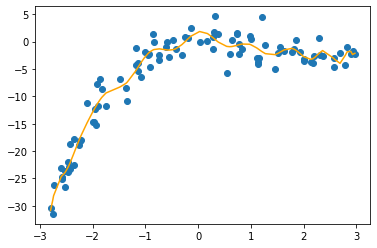

In [58]:
plt.scatter(x, y)

import operator
sort_axis = operator.itemgetter(0)

sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color='orange', label='degree=20')

### The Bias vs Variance trade-off

**Bias** (obciążenie) - odnosi się do błędu wynikającego z uproszczonych założeń modelu dotyczących dopasowania danych. Wysokie obciążenie oznacza, że model nie jest w stanie uchwycić wzorców w danych (także nowych), co powoduje niedopasowanie/niedouczenie (ang. *under-fitting*).

**Variance** - odnosi się do błędu spowodowanego złożonym modelem próbującym dopasować dane. Duża wariancja na nowych danych oznacza, że model przechodzi przez większość punktów danych i powoduje nadmierne dopasowanie do danych (ang. *over-fitting*).

Text(0.5, 0, 'Overfit\nLow bias\nHigh Variance')

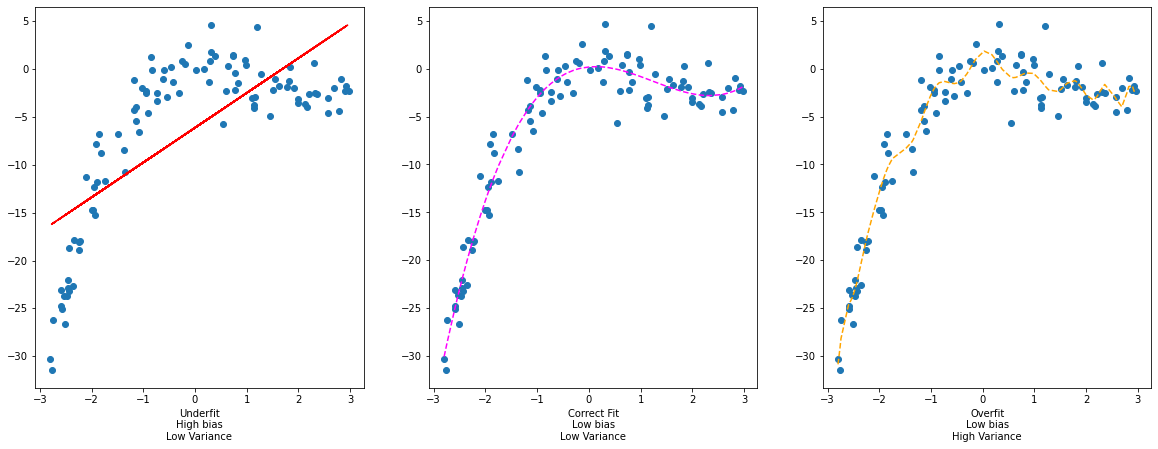

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].scatter(x, y)
ax[0].plot(x, model1.fittedvalues, '--', color='red', label="degree=1")
ax[0].set_xlabel("Underfit\nHigh bias\nLow Variance")

sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[1].scatter(x, y)
ax[1].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
ax[1].set_xlabel("Correct Fit\nLow bias\nLow Variance")

sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[2].scatter(x, y)
ax[2].plot(x_range, y_poly_pred, '--', color='orange', label="degree=20")
ax[2].set_xlabel("Overfit\nLow bias\nHigh Variance")

# Zadanie 2
Wczytaj dane `amazon_salaries.csv` opisujące wysokość rocznych zarobków (`Salary`) w zależności od zajmowanego stanowiska (`Level`). 

Dopasuj model regresji liniowej oraz model regresji wielomianowej, znajdź najlepszy stopień wielomianu.

In [61]:
amazon_salary = pd.read_csv("../../data/amazon_salaries.csv")

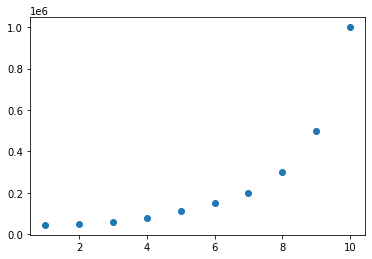

In [65]:
x = amazon_salary.Level
y = amazon_salary.Salary

plt.scatter(x, y)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Sun, 21 May 2023   Prob (F-statistic):            0.00383
Time:                        15:07:41   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.953e+05   1.25e+05     -1.565      0.1

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


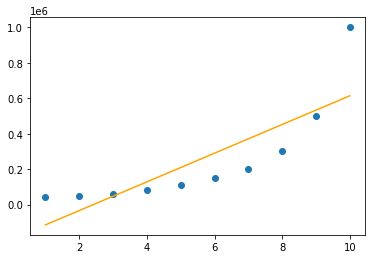

In [68]:
x = np.array(x)
pol1 = PolynomialFeatures(degree = 1)
x1 = pol1.fit_transform(x.reshape(-1, 1))
model1 = sm. OLS(endog = y, exog = x1).fit()
print(model1.summary())

plt.scatter(x, y)
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model1.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color='orange', label ='degree=1')

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3938.
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.80e-07
Time:                        15:11:17   Log-Likelihood:                -97.248
No. Observations:                  10   AIC:                             206.5
Df Residuals:                       4   BIC:                             208.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.133e+04    3.9e+04     -1.060      0.3

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


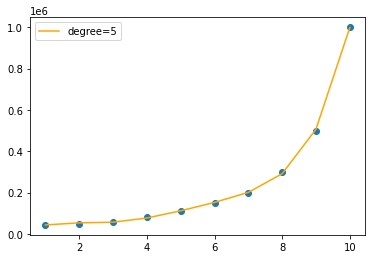

In [80]:
N = 5

x=np.array(x)
polN = PolynomialFeatures(degree = N)
xN = polN.fit_transform(x.reshape(-1, 1))
modelN = sm. OLS(endog = y, exog = xN).fit()
print(modelN.summary())

plt.scatter(x, y)
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, modelN.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range, y_poly_pred, color='orange', label ='degree='+str(N))
plt.legend()